# Example (1): Creating a simple Neural Network from scratch


<img src="https://cdn-images-1.medium.com/max/1024/1*NoPIP-IT-Tatgq9Olu8NBw.jpeg" align="left" width="600">

## Libraries and settings

In [12]:
# Libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Current working directory
print('Current working directory:', os.getcwd())


Current working directory: u:\Lektionen\DA_HS2023\data_analytics\Week_13


## Neural network class

In [13]:
class NeuralNetwork:

    # Intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # Initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    # Activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # Forward feed through the neural network
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # Backward feed through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # Train the neural net
    def train(self, epochs=2500):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # Predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

## Feature-Matrix and target

In [26]:
# Feature matrix (6x3)
inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])

# Target (6x1)
target = np.array([[0], [0], [0], [1], [1], [1]])

## Create neural network

In [15]:
# Create neural network
NN = NeuralNetwork(inputs, target)

# Train neural network
NN.train()

## Predict new data

In [16]:
# Create two new examples to predict                                
example_01   = np.array([[1, 1, 0]])
example_02   = np.array([[0, 1, 1]])

# Print the predictions for both examples                                   
print(NN.predict(example_01), ' - Correct: ', example_01[0][0])
print(NN.predict(example_02), ' - Correct: ', example_02[0][0])

[[0.9705934]]  - Correct:  1
[[0.02073918]]  - Correct:  0


## Plot error over the entire training duration

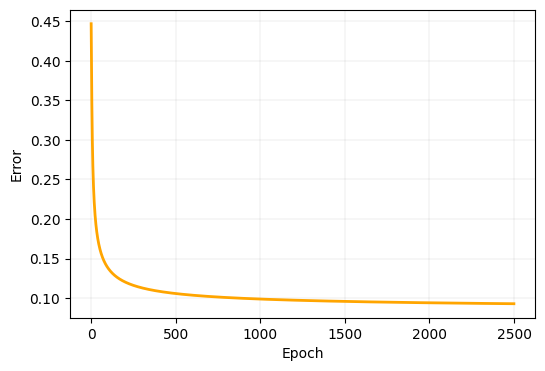

In [17]:
plt.figure(figsize=(6,4))
plt.plot(NN.epoch_list, NN.error_history, color="orange", linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid(color='gray', linestyle='-', linewidth=0.1)
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [18]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-12-04 09:12:25
Python Version: 3.10.13
-----------------------------------
